## Introduction
This notebook originated from the Kaggle bot! However, it only looked at the names of the EEG files in the directory.  Rafael has added the rest.

In [1]:
import mne    # for reading .edf files (and much else)

In [2]:
file = "S001E01.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\S001E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | AF3, F7, F3, FC5, T7, P7, O1, O2, P8, ...
    chs : list | 14 items (EEG: 14)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : tuple | 2018-06-13 14:34:37 GMT
    nchan : int | 14
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
 

In [4]:
channels

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [5]:
raw_data.shape

(14, 46080)

## Exploratory Analysis
The following packages are often useful.

In [6]:
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
#import os # accessing directory structure
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from scipy.io import loadmat   # this function imports .MAT files (MatLab files) into Python (as directories)

### EEG Data

The actual surface electrode readings are given in the dat6 array. For example, at time 1000 we have the following microvolt measurments at each of the 25 leads.

In [7]:
raw_data[:, 1000]

array([4.27519883e-05, 4.65109476e-05, 2.76258476e-05, 5.37701260e-05,
       1.93465649e-05, 1.24181482e-05, 1.06720265e-05, 1.67187913e-05,
       8.44941075e-05, 2.36010758e-05, 4.19182986e-05, 2.76447411e-05,
       2.96294392e-05, 1.54665940e-04])

Lets take a look at lead 10.

In [8]:
channel = 1   # occipital lead  O1 
raw_data[channel, : 50]

array([ 8.65048524e-07,  2.36749975e-06,  2.36749975e-06,  8.65048524e-07,
       -1.71058215e-06, -2.71221630e-06, -2.21139922e-06, -7.08947997e-07,
       -2.08130922e-07, -7.08947997e-07, -1.71058215e-06, -2.21139922e-06,
       -2.21139922e-06, -1.71058215e-06, -2.71221630e-06, -2.71221630e-06,
       -1.20976507e-06,  2.36749975e-06,  4.44231334e-06,  1.86668267e-06,
       -5.28784697e-06, -1.25139219e-05, -1.55903696e-05, -1.14407425e-05,
       -3.28457867e-06,  5.44394749e-06,  1.10960259e-05,  1.20976601e-05,
        1.00943918e-05,  7.01794401e-06,  3.94149627e-06,  2.36749975e-06,
        1.86668267e-06,  2.36749975e-06,  3.94149627e-06,  5.44394749e-06,
        5.94476457e-06,  4.44231334e-06, -2.08130922e-07, -6.36102641e-06,
       -1.04391083e-05, -9.93829123e-06, -5.78866404e-06,  8.65048524e-07,
        5.44394749e-06,  5.94476457e-06,  3.44067919e-06, -2.08130922e-07,
       -3.28457867e-06, -5.28784697e-06])

In [9]:
channels[channel]

'F7'

In [22]:
raw_data[channel,:]

array([ True,  True,  True, ...,  True,  True,  True])

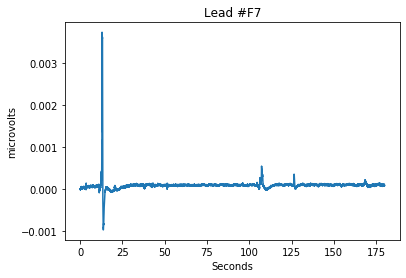

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

x = np.linspace(0, len(raw_data[channel, :]) / 256., len(raw_data[channel, :]))
y = raw_data[channel, :]

plt.plot(x, y)
plt.title('Lead #' + channels[channel]) 
plt.xlabel('Seconds'); plt.ylabel('microvolts')
plt.show()

Let's create a spectrogram for this lead.

[5.41662943e-05 5.26638431e-05 5.57402909e-05 ... 8.44299547e-05
 8.44299547e-05 8.49307718e-05]


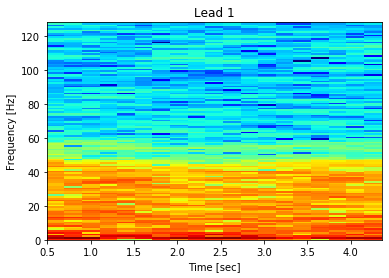

In [69]:
from scipy import signal

x = raw_data[channel, 1280:2560]
print(x)
#x = raw_data[channel, 1280:2561]
#fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
#f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(512, .25))
fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(256), noverlap = 204)

plt.pcolormesh(t, f, np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Lead ' + str(channel)) # + LsEEG[channel]
plt.set_cmap('jet')
#plt.show()
fig, ax = plt.subplots( nrows=1, ncols=1 )
fig.figsize= (800, 800)
ax.pcolormesh(t, f, np.log10(Sxx))
fig.savefig('eeg_small.png')   # save the figure to file
plt.close(fig)


In [59]:
print(len(t))

11


## Run this to generate images

Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S001E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S001E01.edf.
Processing F7 channel of file S001E01.edf.
Processing F3 channel of file S001E01.edf.
Processing FC5 channel of file S001E01.edf.
Processing T7 channel of file S001E01.edf.
Processing P7 channel of file S001E01.edf.
Processing O1 channel of file S001E01.edf.
Processing O2 channel of file S001E01.edf.
Processing P8 channel of file S001E01.edf.
Processing T8 channel of file S001E01.edf.
Processing FC6 channel of file S001E01.edf.
Processing F4 channel of file S001E01.edf.
Processing F8 channel of file S001E01.edf.
Processing AF4 channel of file S001E01.edf.
Processing AF3 channel of file S001E01.edf.
Processing F7 channel of file S001E01.edf.
Processing F3 channel of file S001E01.edf.
Processing FC5 channel of file S001E

C:\Users\omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in log10


Processing T8 channel of file S001E01.edf.
Processing FC6 channel of file S001E01.edf.
Processing F4 channel of file S001E01.edf.
Processing F8 channel of file S001E01.edf.
Processing AF4 channel of file S001E01.edf.
Processing AF3 channel of file S001E01.edf.
Processing F7 channel of file S001E01.edf.
Processing F3 channel of file S001E01.edf.
Processing FC5 channel of file S001E01.edf.
Processing T7 channel of file S001E01.edf.
Processing P7 channel of file S001E01.edf.
Processing O1 channel of file S001E01.edf.
Processing O2 channel of file S001E01.edf.
Processing P8 channel of file S001E01.edf.
Processing T8 channel of file S001E01.edf.
Processing FC6 channel of file S001E01.edf.
Processing F4 channel of file S001E01.edf.
Processing F8 channel of file S001E01.edf.
Processing AF4 channel of file S001E01.edf.
Processing AF3 channel of file S001E01.edf.
Processing F7 channel of file S001E01.edf.
Processing F3 channel of file S001E01.edf.
Processing FC5 channel of file S001E01.edf.
Pro

Processing FC5 channel of file S001E01.edf.
Processing T7 channel of file S001E01.edf.
Processing P7 channel of file S001E01.edf.
Processing O1 channel of file S001E01.edf.
Processing O2 channel of file S001E01.edf.
Processing P8 channel of file S001E01.edf.
Processing T8 channel of file S001E01.edf.
Processing FC6 channel of file S001E01.edf.
Processing F4 channel of file S001E01.edf.
Processing F8 channel of file S001E01.edf.
Processing AF4 channel of file S001E01.edf.
Processing AF3 channel of file S001E01.edf.
Processing F7 channel of file S001E01.edf.
Processing F3 channel of file S001E01.edf.
Processing FC5 channel of file S001E01.edf.
Processing T7 channel of file S001E01.edf.
Processing P7 channel of file S001E01.edf.
Processing O1 channel of file S001E01.edf.
Processing O2 channel of file S001E01.edf.
Processing P8 channel of file S001E01.edf.
Processing T8 channel of file S001E01.edf.
Processing FC6 channel of file S001E01.edf.
Processing F4 channel of file S001E01.edf.
Proce

Processing F4 channel of file S001E01.edf.
Processing F8 channel of file S001E01.edf.
Processing AF4 channel of file S001E01.edf.
Processing AF3 channel of file S001E01.edf.
Processing F7 channel of file S001E01.edf.
Processing F3 channel of file S001E01.edf.
Processing FC5 channel of file S001E01.edf.
Processing T7 channel of file S001E01.edf.
Processing P7 channel of file S001E01.edf.
Processing O1 channel of file S001E01.edf.
Processing O2 channel of file S001E01.edf.
Processing P8 channel of file S001E01.edf.
Processing T8 channel of file S001E01.edf.
Processing FC6 channel of file S001E01.edf.
Processing F4 channel of file S001E01.edf.
Processing F8 channel of file S001E01.edf.
Processing AF4 channel of file S001E01.edf.
Processing AF3 channel of file S001E01.edf.
Processing F7 channel of file S001E01.edf.
Processing F3 channel of file S001E01.edf.
Processing FC5 channel of file S001E01.edf.
Processing T7 channel of file S001E01.edf.
Processing P7 channel of file S001E01.edf.
Proc

Processing AF3 channel of file S001E02.edf.
Processing F7 channel of file S001E02.edf.
Processing F3 channel of file S001E02.edf.
Processing FC5 channel of file S001E02.edf.
Processing T7 channel of file S001E02.edf.
Processing P7 channel of file S001E02.edf.
Processing O1 channel of file S001E02.edf.
Processing O2 channel of file S001E02.edf.
Processing P8 channel of file S001E02.edf.
Processing T8 channel of file S001E02.edf.
Processing FC6 channel of file S001E02.edf.
Processing F4 channel of file S001E02.edf.
Processing F8 channel of file S001E02.edf.
Processing AF4 channel of file S001E02.edf.
Processing AF3 channel of file S001E02.edf.
Processing F7 channel of file S001E02.edf.
Processing F3 channel of file S001E02.edf.
Processing FC5 channel of file S001E02.edf.
Processing T7 channel of file S001E02.edf.
Processing P7 channel of file S001E02.edf.
Processing O1 channel of file S001E02.edf.
Processing O2 channel of file S001E02.edf.
Processing P8 channel of file S001E02.edf.
Proce

Processing P8 channel of file S001E02.edf.
Processing T8 channel of file S001E02.edf.
Processing FC6 channel of file S001E02.edf.
Processing F4 channel of file S001E02.edf.
Processing F8 channel of file S001E02.edf.
Processing AF4 channel of file S001E02.edf.
Processing AF3 channel of file S001E02.edf.
Processing F7 channel of file S001E02.edf.
Processing F3 channel of file S001E02.edf.
Processing FC5 channel of file S001E02.edf.
Processing T7 channel of file S001E02.edf.
Processing P7 channel of file S001E02.edf.
Processing O1 channel of file S001E02.edf.
Processing O2 channel of file S001E02.edf.
Processing P8 channel of file S001E02.edf.
Processing T8 channel of file S001E02.edf.
Processing FC6 channel of file S001E02.edf.
Processing F4 channel of file S001E02.edf.
Processing F8 channel of file S001E02.edf.
Processing AF4 channel of file S001E02.edf.
Processing AF3 channel of file S001E02.edf.
Processing F7 channel of file S001E02.edf.
Processing F3 channel of file S001E02.edf.
Proc

Processing F3 channel of file S001E02.edf.
Processing FC5 channel of file S001E02.edf.
Processing T7 channel of file S001E02.edf.
Processing P7 channel of file S001E02.edf.
Processing O1 channel of file S001E02.edf.
Processing O2 channel of file S001E02.edf.
Processing P8 channel of file S001E02.edf.
Processing T8 channel of file S001E02.edf.
Processing FC6 channel of file S001E02.edf.
Processing F4 channel of file S001E02.edf.
Processing F8 channel of file S001E02.edf.
Processing AF4 channel of file S001E02.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S001E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S001E03.edf.
Processing F7 channel of file S001E03.edf.
Processing F3 channel of file S001E03.edf.
Processing FC5 channel of file S001E03.edf.
Processing T7 channel of file S001E03.edf.
Processing P7 channel of file S001E0

Processing T7 channel of file S001E03.edf.
Processing P7 channel of file S001E03.edf.
Processing O1 channel of file S001E03.edf.
Processing O2 channel of file S001E03.edf.
Processing P8 channel of file S001E03.edf.
Processing T8 channel of file S001E03.edf.
Processing FC6 channel of file S001E03.edf.
Processing F4 channel of file S001E03.edf.
Processing F8 channel of file S001E03.edf.
Processing AF4 channel of file S001E03.edf.
Processing AF3 channel of file S001E03.edf.
Processing F7 channel of file S001E03.edf.
Processing F3 channel of file S001E03.edf.
Processing FC5 channel of file S001E03.edf.
Processing T7 channel of file S001E03.edf.
Processing P7 channel of file S001E03.edf.
Processing O1 channel of file S001E03.edf.
Processing O2 channel of file S001E03.edf.
Processing P8 channel of file S001E03.edf.
Processing T8 channel of file S001E03.edf.
Processing FC6 channel of file S001E03.edf.
Processing F4 channel of file S001E03.edf.
Processing F8 channel of file S001E03.edf.
Proces

KeyboardInterrupt: 

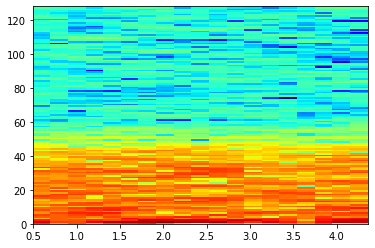

In [72]:
import matplotlib.pyplot as plt # plotting
import mne
import numpy as np # linear algebra
import os
from scipy import signal
from sklearn.preprocessing import StandardScaler

# If folders don't exist already create them in the home directory.
if not os.path.exists("raw_images"):
    os.mkdir("raw_images")
if not os.path.exists("raw_images/relaxed"):
    os.mkdir("raw_images/relaxed")
if not os.path.exists("raw_images/concentration"):
    os.mkdir("raw_images/concentration")
if not os.path.exists("spectrogram_images"):
    os.mkdir("spectrogram_images")
if not os.path.exists("spectrogram_images/relaxed"):
    os.mkdir("spectrogram_images/relaxed")
if not os.path.exists("spectrogram_images/concentration"):
    os.mkdir("spectrogram_images/concentration")

for filename in os.listdir('eeg-dataset-of-fusion-relaxation-and-concentration-moods'):
    file_name = os.path.join('eeg-dataset-of-fusion-relaxation-and-concentration-moods',filename)
    
    file_type = 0 if filename.split(".")[0].endswith("E01") or filename.split(".")[0].endswith("E03") else 1
    data = mne.io.read_raw_edf(file_name)
    raw_data = data.get_data()
    info = data.info
    channels = data.ch_names
    for part in range(36):
        for index, channel in enumerate(channels):
            print("Processing %s channel of file %s." % (channel, filename))
            folder_name = filename.split(".")[0] + "_" + str(part)
            folder_path = os.path.join('raw_images/relaxed',folder_name) if file_type == 0 else os.path.join('raw_images/concentration',folder_name)
            if not os.path.exists(folder_path):
                os.mkdir(folder_path)
            new_filename = "%s_%s.png" % (folder_name, channel)
            # path to store raw time domain images of the signals
            # choose folder based on file type
            start = part * 1280
            end = (part+1) * 1280
            new_file_path = os.path.join(folder_path, new_filename)
            x = np.linspace(0, len(raw_data[index, start:end]) / 256., len(raw_data[index, start:end]))
            y = raw_data[index, start:end]
            fig, ax = plt.subplots( nrows=1, ncols=1 )
            fig.figsize= (800, 800)
            ax.plot(x, y)
            #ax.title('Lead #' + channel) 
            #ax.xlabel('Seconds'); plt.ylabel('microvolts')
            fig.savefig(new_file_path)   # save the figure to file
            plt.close(fig)
            #plt.plot(x, y)
            #plt.show()

            # path to store frequency domain spectrogram images of the signals
            folder_path = os.path.join('spectrogram_images/relaxed',folder_name) if file_type == 0 else os.path.join('raw_images/concentration',folder_name)
            if not os.path.exists(folder_path):
                os.mkdir(folder_path)
            new_filename = "%s_%s.png" % (folder_name, channel)
            new_file_path = os.path.join(folder_path, new_filename)
            x = raw_data[index, start:end]
            fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
            #f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(512, .25))
            f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(256), noverlap = 204)
            fig, ax = plt.subplots( nrows=1, ncols=1 )
            fig.figsize= (800, 800)
            ax.pcolormesh(t, f, np.log10(Sxx))
            #ax.ylabel('Frequency [Hz]')
            #ax.xlabel('Time [sec]')
            #plt.title('Lead ' + channel) # + LsEEG[channel]
            #ax.set_cmap('jet')
            #plt.show()
            fig.savefig(new_file_path)   # save the figure to file
            plt.close(fig)
    
    '''
    f = pyedflib.EdfReader(file_name)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    new_filename = filename.replace(".edf",".csv")
    new_file_path = os.path.join('spectrogram_files',new_filename)
    os.mkdir(new_file_path)
    with open(new_file_path, mode='w') as record_file:
        record_writer = csv.writer(record_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for record in sigbufs:
            record_writer.writerow(record)
    '''